In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [3]:
# Load dataset
df = pd.read_csv('car.csv')
print(df.head())
print(df.info())

  buying  maint doors persons lug_boot safety  class
0   high  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [4]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print(df.head())

   buying  maint  doors  persons  lug_boot  safety  class
0       0      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


In [5]:
# Split data
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train XGBoost Classifier model
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_classifier.fit(X_train, y_train)
print("Model training complete.")

C:\Users\mhmda\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:56:39] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model training complete.


In [7]:
# Evaluate the model
y_pred = xgb_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        83
           1       0.69      1.00      0.81        11
           2       1.00      1.00      1.00       235
           3       1.00      0.88      0.94        17

    accuracy                           0.98       346
   macro avg       0.92      0.96      0.93       346
weighted avg       0.99      0.98      0.98       346

Accuracy: 0.98


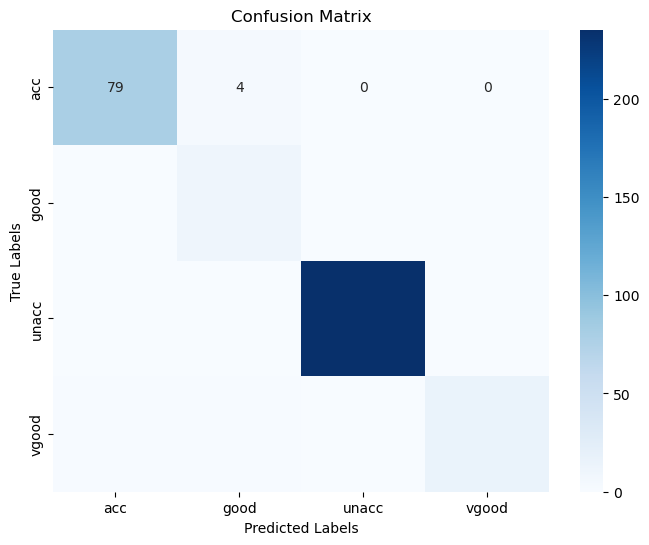

In [8]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['class'].classes_, yticklabels=label_encoders['class'].classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_classifier.feature_importances_
})

# Sort by importance values
top_features = feature_importance.sort_values(by='Importance', ascending=False)

# Display top features
print("Top Features based on XGBoost Feature Importance:")
print(top_features.head(10))

Top Features based on XGBoost Feature Importance:
    Feature  Importance
5    safety    0.346746
3   persons    0.263030
1     maint    0.142052
0    buying    0.133680
4  lug_boot    0.081826
2     doors    0.032666
